In [4]:
%matplotlib inline

In [12]:
# styling
from IPython import utils  
from IPython.core.display import HTML  
import os  
def css_styling():  
    """Load default custom.css file from ipython profile"""
    base = utils.path.get_ipython_dir()
    styles = "<style>\n%s\n</style>" % (open(os.path.join(base,'profile_default/static/custom/custom.css'),'r').read())
    return HTML(styles)
css_styling()  

In [10]:
# header code
import numpy as np
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels import discrete
import re
import pandas as pd
import math 
import csv
import time
import dateutil
from datetime import datetime
import seaborn as sns
# pandas options plus some more
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
pd.options.display.float_format = '{:,.2f}'.format
sns.set_style("whitegrid")
sns.set_context("poster")
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import ticker

from IPython.display import Image
from IPython.core.display import HTML


millnames = ['',' Thousand',' Million',' Billion',' Trillion']
def millify(n, pos):
    n = float(n)
    millidx = max(0,min(len(millnames)-1,
                        int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))
    thingtoreturn = n / 10**(3 * millidx)
    if thingtoreturn % 1 == 0:
        return '{:.0f}{}'.format(thingtoreturn, millnames[millidx])
    elif thingtoreturn % 0.1 == 0:
        return '{:.1f}{}'.format(thingtoreturn, millnames[millidx])
    else:
        return '{:.2f}{}'.format(thingtoreturn, millnames[millidx])

# Table of Contents
[Abstract](#abstract)
  
[Background & Motivation](#background)
  * [Party switching and national alignment](#switching)
  * [National & local politics 2008-today](#politics)
  * [Political Data](#political_data)
  * [Benefits of National Alignment](#benefits)
  
[Exploring State Transfers](#analysis)
  * [Data](#data)
  * [Overview of Serbia and Municipalities](#municipality_overview)
      * [Serbia](#serbia)
      * [Geography and demographics](#mungeodem)
      * [Incomes and expenditure](#mungeodem)      
      * [Political characters of municipalities](#political_characters)



# Abstract <a id="abstract"></a>

&emsp;&emsp;&emsp; Local politicians switch their party affiliations towards parties in power at the national level, or so it has been believed in Serbia. In this paper, we first document evidence supporting this hypothesis by looking at party affiliations of municipal presidents over the last six years during a major national regime change. Second, we examine one possible explanation for this phenomenon: the distribution of transfers from state to local governments in the period 2011-2013.

# Background & Motivation <a id="background"></a>

## Party switching and national alignment <a id="switching"></a>

&emsp;&emsp;&emsp; Cases of local alderman switching their party affiliations have been reported with some frequency in the Serbian news. It is widely believed that this phenomenon occurs frequently and typically in favor of parties which hold power at the national level.

&emsp;&emsp;&emsp; This is possible, because, in Serbia, both national representatives and local alderman are elected proportionally. Voters vote for lists of candidates submitted by political parties, not  individual representatives. Once elected, however, representatives have no obligations to their party. 

&emsp;&emsp;&emsp; Serbian political dynamics and events of the last decade are uniquely suitable to examining this hypothesis and phenomenon. Do politicians at the local level really exhibit a tendency to switch their affiliations towards political parties that hold national power?

## National & local politics 2008-today <a id="politics"></a>

&emsp;&emsp;&emsp; Between 2008 and today, there has been a dramatic shift in political power at the national level in Serbia. Essentially, power shifted from the Democratic Party (DS) to the Serbian Progressive Party (SNS). The following table shows the number of seats won in parliamentary elections by coalitions around the parties:

| Party\* | 2008 |2012|2014|
|:----------|:----------|:----------|:----------|
|DS|<span class="mark">102</span>|73|37|
|SNS|78|67|<span class="mark">158</span>|
|SPS|20|44|44|
<font size="2">&emsp;&emsp;*In 2008, the leaders of SNS were still part of SRS, I list SRS's share here. <br>
&emsp;&emsp;*In 2014, DS split into two factions, I list their joint share.</font> 

&emsp;&emsp;&emsp; It is important to note that the distribution of votes was not drastically different between 2008 and 2012. The Serbian public largely expected DS to remain in power, in coalition with SPS (Socialist Party of Serbia), post-2012. However, after prolonged negotiations, SPS formed the national government with SNS. During the 2012-2014 tenure of this government, SNS's popularity rose sharply and, in 2014, SNS took a landslide victory. 

&emsp;&emsp;&emsp; Despite massive changes in power at the national level, local elections were not held since 2012, providing an excellent setting in which to test the party switching and national alignment hypotheses. 

## Political data <a id="political_data"></a>

&emsp;&emsp;&emsp; Unfortunately, no official dataset of the political affiliations of individual aldermen exists. To get around this, we compile and examine a novel dataset of the political affiliations of *municipal presidents* through the period 2011-today. The municipal president is appointed by the municipal assembly and holds the most executive power in a municipality. As such, their personal political affiliation is an excellent proxy for political control.

&emsp;&emsp;&emsp; The shortcoming of this measure is that it does not identify changes of political control which occur solely due to local chapters of SPS switching to coalitions with SNS. Post-2012, it  is reasonable to expect SNS and SPS to form coalitions at the local level. In fact, in October 2012, the national leadership of both parties publicly ordered their local chapters to follow suit. 

&emsp;&emsp;&emsp; To deal with this issue, we look at two things. First, as can be observed in the figure below, changes in political affiliation of municipal presidents in favor of SNS continue up to this day, well beyond the time frame imposed by SPS and SNS for their local chapters to match the national coalition. This is strongly indicative of a trend of local aldermen, other than those in SPS, switching their political affiliations to the new nationally dominant party, SNS.   

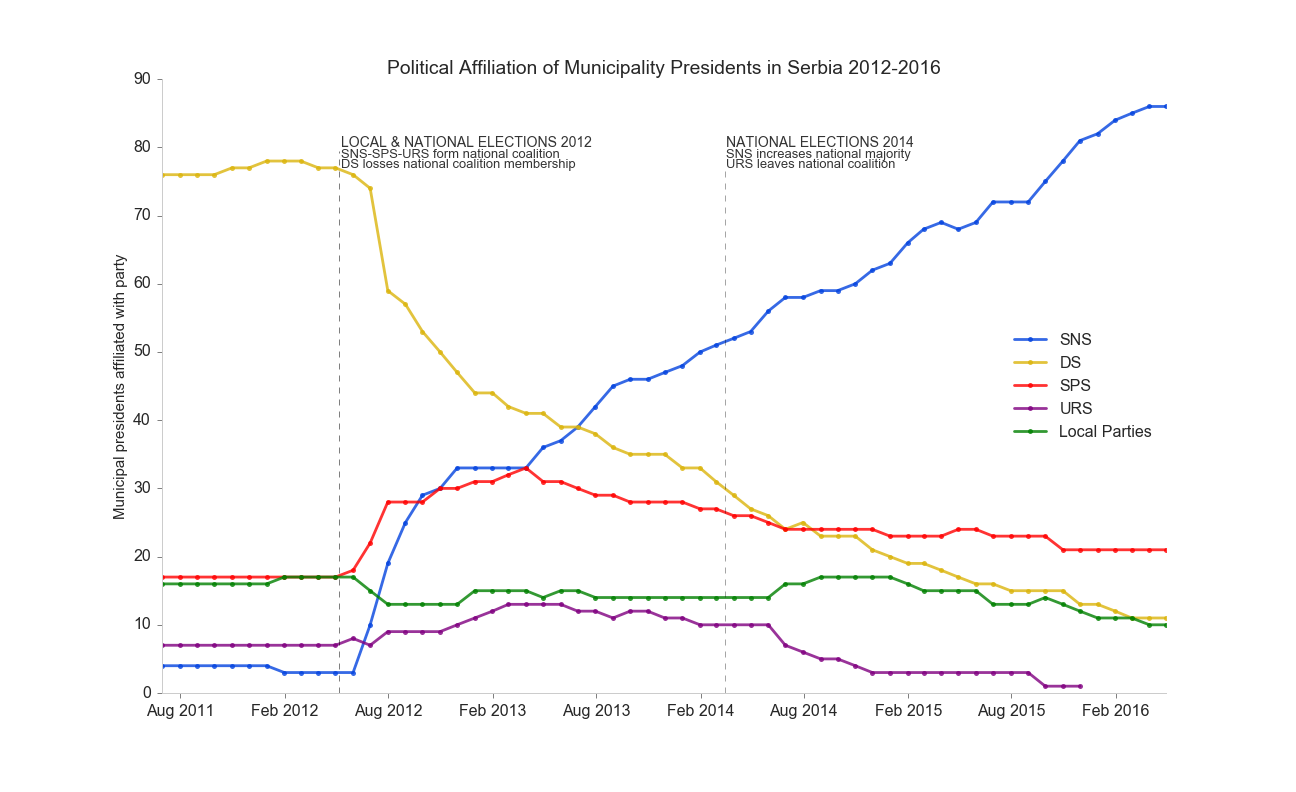

In [88]:
# Figure 1
Image("./exports/figures/Political Affiliation of Municipality Presidents in Serbia 2012-2016.png", width=1000)

&emsp;&emsp;&emsp; Second, and much more directly, we look at instances in which the party affiliation of a local president changes, but the president does not, i.e. cases where the municipal presidents themselves change their party affiliation. Out of 154 municipalities, from the election on May 6th, 2012, to today, we observed 32 instances of municipal presidents switching their party affiliations. Some presidents switched multiple times, leaving 26 unique presidents who switched affiliations in  26 unique municipalities. 

&emsp;&emsp;&emsp; The breakdown of the political nature of these switches is listed below. Note, 12 were non-interesting in that they were forced due to the national break-up or termination of specific parties and did not result in any change in national political alignment of the municipality. Out of the 20 remaining  switches, 15 were to incumbent parties, out of which 12 were to SNS.  Another 3 were away from the main opposition party, DS. This means that out of 20 non-forced swtiches, a total of 18 were in the direction our hypothesis would predict, towards national incumbents, and away from national opposition parties. This evidence strongly supports the notion that party switching is commonplace in Serbia and that it occurs towards alignment with national incumbents.    

| Event | Observations |
|:-----------------|:-------|
|Opposition to SNS|3|
|Independent to SNS|8|
|Incumbent to SNS|1|
|Opposition to Incumbent|1|
|Independent to Incumbent|1|
|Incumbent to Incumbent|1|
|DS to Independent|3|
|Independent to Independent|2|
|Party splits or terminations|12|

## Benefits of National Alignment <a id="benefits"></a>

&emsp;&emsp;&emsp; The obvious next question and main topic of the remainder of this paper is why might local politicians align themselves with the national government? For context, we note a couple strong contenders:
1. Greater likelihood of reelection thanks to national party visibility/popularity\*
2. Increased financing directly to local party from national party\*\*
3. Increased investment (projects) in municipality by national government 
4. Increased direct transfers to municipality from national government
5. Forgiving of debt held by municipality and municipal enterprises towards national government


<font size="2">&emsp;&emsp;\* hypothesis 1. is consistent with the theory that local politicians align themselves with *more* *popular* national &emsp;&emsp;&emsp; parties, not necessarily incumbents. Our evidence provides support for this theory as well.
<br>
&emsp;&emsp;\*\* hypothesis 2. could be consistent with both the popularity and incumbency narratives, as both could be lead &emsp;&emsp;&emsp; to increased financing to the national party. 
</font>

In this paper, I focus on testing hypothesis 4. 

# Exploring State Transfers <a id="analysis"></a>

The remainder of this draft is in bullet/data form:

- First, I present contextual data. 

- Second, I present my plan for possible analyses and the preliminary results of those I have already carried out. 

## Data & sources<a id="data"></a>

I currently use four different datasets on municipalities, one of which has already been mentioned:

| Data | # of Munic | Years    | Source |
|:----------|:----------|:----------|:----------|
|*budget / expenditure* breakdown by economic and functional classifications | 120 |2011-2015 | Serbian Ministry of State Administration and Local Self Government\* |
|*income* breakdown by economic classifications | 145 | 2011-2013 | Serbian Secretariat for Regulatory Impact Assessment\* | 
|*political affiliation* data | 152 | 2011-2016 |Collected and compiled by the author |
|*demographic* data | 170 | 2010-2015 | Serbian National Statistics Office| 

<font size="2">\* The data I received was individually requested and compiled by different government bodies from municipalities. <br> As such, it required some cleaning and is not perfect. The Ministry of Finance mandates reporting but does not currently uniformly control for quality. Municipalities are subject to random audits and these serve as impetus for quality and truthful reporting. Some municipalities have been sanctioned in recent years as well.</font>

## Overview of Serbia and municipalities <a id="municipality_overview"></a>

### Serbia <a id="serbia"></a>
<br> All statistics exclude Kosovo.  

Population: 7 million <br>
GDP: $37.740  billion <br>
Total Municipalities: 145 + 25 city districts\* 

\*City districts are technically the same form of local self-government as a municipality. We include them in some analysis and exclude them in others depending on subtleties of regulation and practice.  

### Municipality geography and demographics <a id="mungeodem"></a>

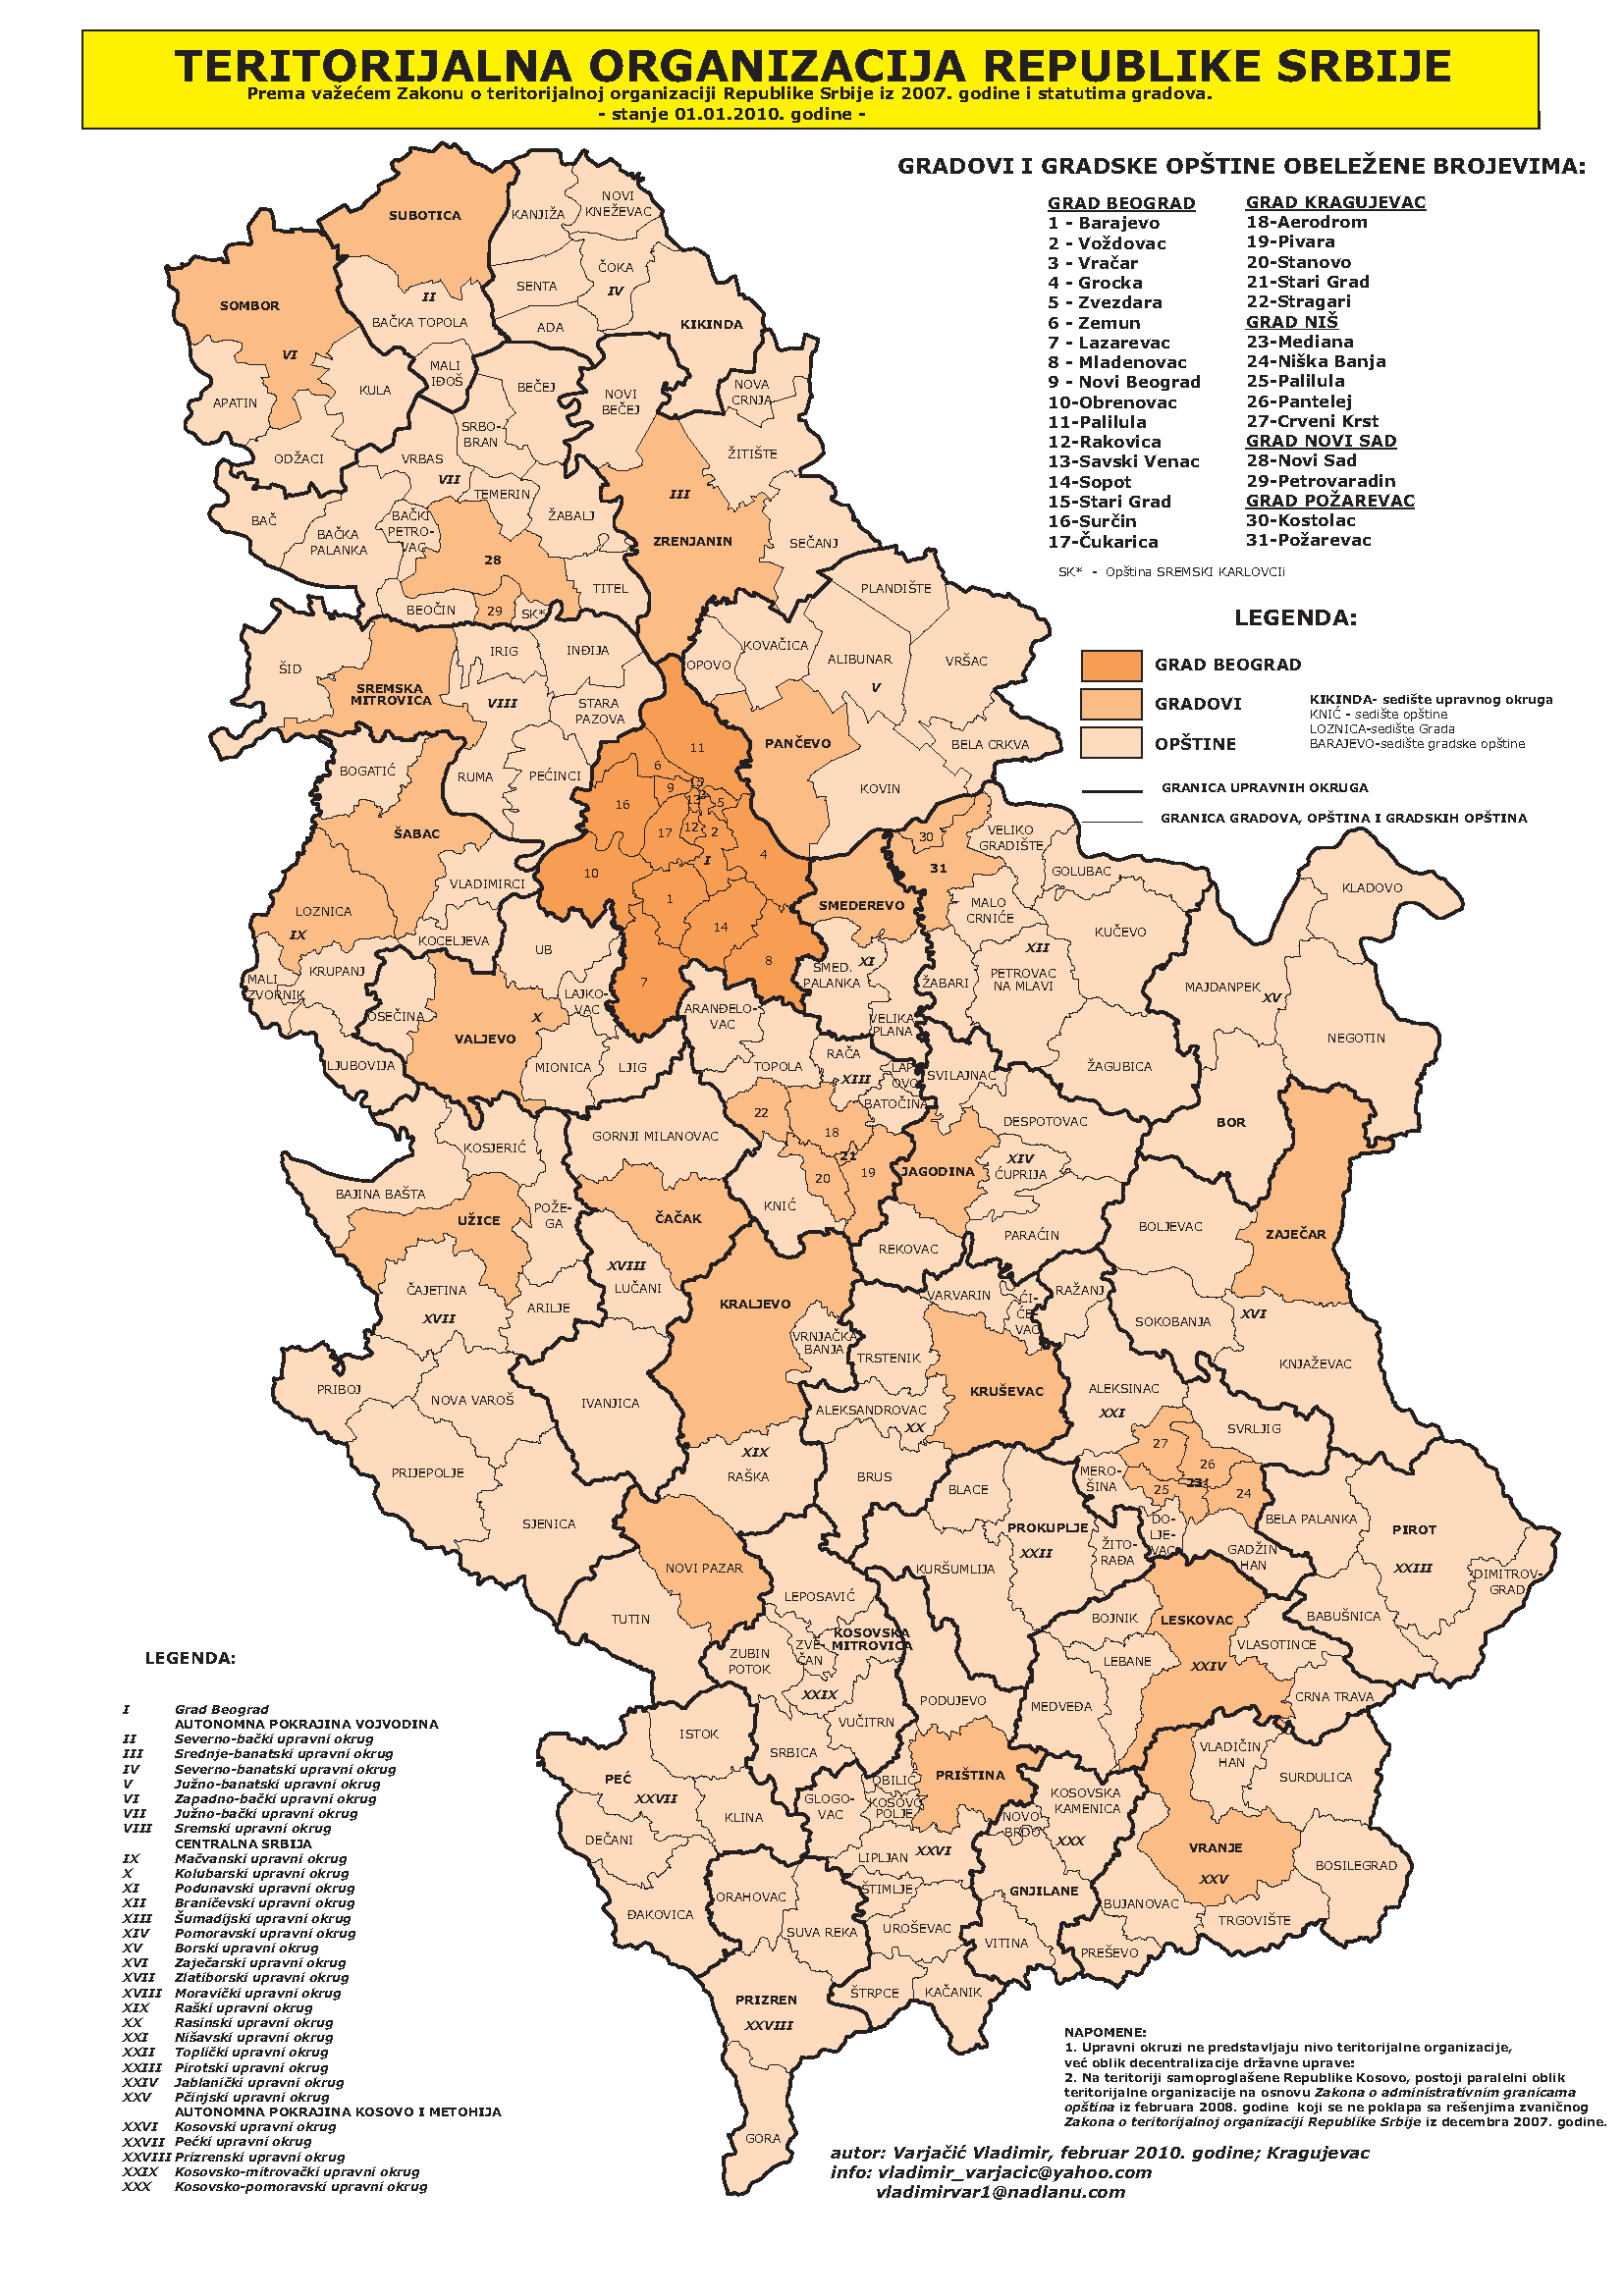

In [86]:
# Municipality Map
Image("./exports/figures/municipalitiesmap.png", width=700)

** Area and Population Dashboard **
<script type='text/javascript' src='https://public.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 982px; height: 742px;'><noscript><a href='#'><img alt='Pop and Area Hists ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;F6&#47;F68KR2F8N&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz' width='982' height='742' style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='path' value='shared&#47;F68KR2F8N' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;F6&#47;F68KR2F8N&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='showTabs' value='y' /></object></div>

&emsp;&emsp;&emsp; Note, the majority of municipalities are small, with less than 50K population.

** Ethnic Dashboard**<br>
Note, this data was collected during the 2011 Census in Serbia. The census was boycotted by ethnic Albanians in the southeast of the country. Three municipalities have significant Albanian populations, Presevo, Medvedja, and Bujanovac. 


<script type='text/javascript' src='https://public.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 954px; height: 742px;'><noscript><a href='#'><img alt='Ethnic Dashboard ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;RQ&#47;RQ3G428B2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz' width='954' height='742' style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='path' value='shared&#47;RQ3G428B2' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;RQ&#47;RQ3G428B2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='showTabs' value='y' /></object></div>

** Average Wage Dashboard **
<script type='text/javascript' src='https://public.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 954px; height: 742px;'><noscript><a href='#'><img alt='Average Wages ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ge&#47;GeneralDescriptionMunicipalities&#47;AverageWages&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz' width='954' height='742' style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='GeneralDescriptionMunicipalities&#47;AverageWages' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ge&#47;GeneralDescriptionMunicipalities&#47;AverageWages&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='showTabs' value='y' /></object></div>

** Employment Dashboard **
<script type='text/javascript' src='https://public.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 954px; height: 742px;'><noscript><a href='#'><img alt='Employment Dashboard ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ge&#47;GeneralDescriptionMunicipalities&#47;EmploymentDashboard&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz' width='954' height='742' style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='GeneralDescriptionMunicipalities&#47;EmploymentDashboard' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ge&#47;GeneralDescriptionMunicipalities&#47;EmploymentDashboard&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='showTabs' value='y' /></object></div>

### Municipality incomes and expenditures <a id="mun_inc_and_exp"></a>

### Political characters of municipalities <a id="political_characters"></a>


To be included:

Basic:
- total number, breakdown by city, city districts, rest + kosovo (our focus is on rest)
- distributions by population
- distribbution by land size
- distribution by pop density

Wealth:
- average wages and/or budget per capita
- employment

